In [ ]:
# Load libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import matplotlib.pyplot as plt

In [ ]:
df= pd.read_csv("/content/Train.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (85) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df.head()

,Unnamed..0,Flow.ID,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Timestamp,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,Fwd.Packet.Length.Max,Fwd.Packet.Length.Min,Fwd.Packet.Length.Mean,Fwd.Packet.Length.Std,Bwd.Packet.Length.Max,Bwd.Packet.Length.Min,Bwd.Packet.Length.Mean,Bwd.Packet.Length.Std,Flow.Bytes.s,Flow.Packets.s,Flow.IAT.Mean,Flow.IAT.Std,Flow.IAT.Max,Flow.IAT.Min,Fwd.IAT.Total,Fwd.IAT.Mean,Fwd.IAT.Std,Fwd.IAT.Max,Fwd.IAT.Min,Bwd.IAT.Total,Bwd.IAT.Mean,Bwd.IAT.Std,Bwd.IAT.Max,Bwd.IAT.Min,Fwd.PSH.Flags,Bwd.PSH.Flags,Fwd.URG.Flags,...,Packet.Length.Std,Packet.Length.Variance,FIN.Flag.Count,SYN.Flag.Count,RST.Flag.Count,PSH.Flag.Count,ACK.Flag.Count,URG.Flag.Count,CWE.Flag.Count,ECE.Flag.Count,Down.Up.Ratio,Average.Packet.Size,Avg.Fwd.Segment.Size,Avg.Bwd.Segment.Size,Fwd.Header.Length.1,Fwd.Avg.Bytes.Bulk,Fwd.Avg.Packets.Bulk,Fwd.Avg.Bulk.Rate,Bwd.Avg.Bytes.Bulk,Bwd.Avg.Packets.Bulk,Bwd.Avg.Bulk.Rate,Subflow.Fwd.Packets,Subflow.Fwd.Bytes,Subflow.Bwd.Packets,Subflow.Bwd.Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active.Mean,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,SimillarHTTP,Inbound,Label
0,1110,172.16.0.5-192.168.50.1-872-45984-17,172.16.0.5,872,192.168.50.1,45984,17,29:44.0,2,2,0,2944,0,1472,1472,1472.0,0.0,0,0,0.0,0.0,1.470000e+09,1.000000e+06,2.0,0.0,2.0,2,2,2.0,0.0,2,2,0,0.0,0.0,0.0,0,0,0,0,...,0.0,0.0,0,0,0,0,0,0,0,0,0,2208.0,1472.0,0.0,0.0,0,0,0,0,0,0,2,2944,0,0,-1,-1,1,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0,1,DrDoS_LDAP
1,25998,172.16.0.5-192.168.50.1-867-39632-17,172.16.0.5,867,192.168.50.1,39632,17,31:01.1,43,2,0,2944,0,1472,1472,1472.0,0.0,0,0,0.0,0.0,6.846512e+07,4.651163e+04,43.0,0.0,43.0,43,43,43.0,0.0,43,43,0,0.0,0.0,0.0,0,0,0,0,...,0.0,0.0,0,0,0,0,0,0,0,0,0,2208.0,1472.0,0.0,0.0,0,0,0,0,0,0,2,2944,0,0,-1,-1,1,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0,1,DrDoS_LDAP
2,10751,172.16.0.5-192.168.50.1-818-826-17,172.16.0.5,818,192.168.50.1,826,17,24:38.4,1,2,0,2944,0,1472,1472,1472.0,0.0,0,0,0.0,0.0,2.940000e+09,2.000000e+06,1.0,0.0,1.0,1,1,1.0,0.0,1,1,0,0.0,0.0,0.0,0,0,0,0,...,0.0,0.0,0,0,0,0,0,0,0,0,0,2208.0,1472.0,0.0,40.0,0,0,0,0,0,0,2,2944,0,0,-1,-1,1,20,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0,1,DrDoS_LDAP
3,15983,172.16.0.5-192.168.50.1-894-32984-17,172.16.0.5,894,192.168.50.1,32984,17,27:01.5,1,2,0,2944,0,1472,1472,1472.0,0.0,0,0,0.0,0.0,2.940000e+09,2.000000e+06,1.0,0.0,1.0,1,1,1.0,0.0,1,1,0,0.0,0.0,0.0,0,0,0,0,...,0.0,0.0,0,0,0,0,0,0,0,0,0,2208.0,1472.0,0.0,-2.0,0,0,0,0,0,0,2,2944,0,0,-1,-1,1,-1,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0,1,DrDoS_LDAP
4,29733,172.16.0.5-192.168.50.1-877-12571-17,172.16.0.5,877,192.168.50.1,12571,17,26:58.1,3,2,0,2944,0,1472,1472,1472.0,0.0,0,0,0.0,0.0,9.813333e+08,6.666667e+05,3.0,0.0,3.0,3,3,3.0,0.0,3,3,0,0.0,0.0,0.0,0,0,0,0,...,0.0,0.0,0,0,0,0,0,0,0,0,0,2208.0,1472.0,0.0,0.0,0,0,0,0,0,0,2,2944,0,0,-1,-1,1,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0,1,DrDoS_LDAP


In [ ]:
df.Label.unique()

array(['DrDoS_LDAP', 'DrDoS_DNS', 'DrDoS_MSSQL', 'DrDoS_UDP',
       'DrDoS_NetBIOS', 'Syn', 'UDP-lag', 'DrDoS_SSDP', 'DrDoS_SNMP',
       'DrDoS_NTP', 'TFTP', 'BENIGN'], dtype=object)

In [ ]:
df1 = df.replace(to_replace ="DrDoS_LDAP", 
                 value =1.0) 
df2 = df1.replace(to_replace ="DrDoS_DNS", 
                 value =2.0)
df3 = df2.replace(to_replace ="DrDoS_MSSQL", 
                 value =3.0)
df4 = df3.replace(to_replace ="DrDoS_UDP", 
                 value =4.0)
df5 = df4.replace(to_replace ="DrDoS_NetBIOS", 
                 value =5.0)
df6 = df5.replace(to_replace ="Syn", 
                 value =6.0)
df7 = df6.replace(to_replace ="UDP-lag", 
                 value =7.0)
df8 = df7.replace(to_replace ="DrDoS_SSDP", 
                 value =8.0)
df9 = df8.replace(to_replace ="DrDoS_SNMP", 
                 value =9.0)
df10 = df9.replace(to_replace ="DrDoS_NTP", 
                 value =10.0)
df11 = df10.replace(to_replace ="TFTP", 
                 value =11.0)
df12 = df11.replace(to_replace ="BENIGN", 
                 value =0.0)

In [ ]:
df12.Label.unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.,  0.])

In [ ]:
df12["Flow.ID"] = df12["Flow.ID"].str.replace(r'\D', '')
df12["Source.IP"] = df12["Source.IP"].str.replace(r'\D', '')
df12["Destination.IP"] = df12["Destination.IP"].str.replace(r'\D', '')
df12["Timestamp"] = df12["Timestamp"].str.replace(r'\D', '')
df13 = df12.drop(columns=['SimillarHTTP'])
df14 =  df13.replace([np.inf, -np.inf], np.nan)
df15 = df14.fillna(0)


In [ ]:
print(df15.dtypes)

Unnamed..0          int64
Flow.ID            object
Source.IP          object
Source.Port         int64
Destination.IP     object
                   ...   
Idle.Std          float64
Idle.Max          float64
Idle.Min          float64
Inbound             int64
Label             float64
Length: 87, dtype: object


In [ ]:
df16 = df15.astype(float)

In [ ]:
print(df16.dtypes)

Unnamed..0        float64
Flow.ID           float64
Source.IP         float64
Source.Port       float64
Destination.IP    float64
                   ...   
Idle.Std          float64
Idle.Max          float64
Idle.Min          float64
Inbound           float64
Label             float64
Length: 87, dtype: object


In [ ]:
df16.isnull().values.any()

False

In [ ]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold

In [ ]:
a=df16.drop(labels=['Label'], axis=1)
b=df16['Label']

In [ ]:
from sklearn.model_selection import train_test_split
# separate dataset into train and test
a_train, a_test, b_train, b_test = train_test_split(
    df16.drop(labels=['Label'], axis=1),
    df16['Label'],
    test_size=0.3,
    random_state=0)

a_train.shape, a_test.shape

((252000, 86), (108000, 86))

In [ ]:
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(a_train)

VarianceThreshold(threshold=0)

In [ ]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True, False,
        True,  True,  True, False,  True,  True,  True,  True,  True,
       False, False, False, False, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [ ]:
### Finding non constant features
sum(var_thres.get_support())

74

In [ ]:
# Lets Find non-constant features 
len(a_train.columns[var_thres.get_support()])

74

In [ ]:
constant_columns = [column for column in a_train.columns
                    if column not in a_train.columns[var_thres.get_support()]]

print(len(constant_columns))

12


In [ ]:
for column in constant_columns:
    print(column)

Bwd.PSH.Flags
Fwd.URG.Flags
Bwd.URG.Flags
FIN.Flag.Count
PSH.Flag.Count
ECE.Flag.Count
Fwd.Avg.Bytes.Bulk
Fwd.Avg.Packets.Bulk
Fwd.Avg.Bulk.Rate
Bwd.Avg.Bytes.Bulk
Bwd.Avg.Packets.Bulk
Bwd.Avg.Bulk.Rate


In [ ]:
a_train = a_train.drop(constant_columns,axis=1)

In [ ]:
a_train

,Unnamed..0,Flow.ID,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Timestamp,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,Fwd.Packet.Length.Max,Fwd.Packet.Length.Min,Fwd.Packet.Length.Mean,Fwd.Packet.Length.Std,Bwd.Packet.Length.Max,Bwd.Packet.Length.Min,Bwd.Packet.Length.Mean,Bwd.Packet.Length.Std,Flow.Bytes.s,Flow.Packets.s,Flow.IAT.Mean,Flow.IAT.Std,Flow.IAT.Max,Flow.IAT.Min,Fwd.IAT.Total,Fwd.IAT.Mean,Fwd.IAT.Std,Fwd.IAT.Max,Fwd.IAT.Min,Bwd.IAT.Total,Bwd.IAT.Mean,Bwd.IAT.Std,Bwd.IAT.Max,Bwd.IAT.Min,Fwd.PSH.Flags,Fwd.Header.Length,Bwd.Header.Length,Fwd.Packets.s,Bwd.Packets.s,Min.Packet.Length,Max.Packet.Length,Packet.Length.Mean,Packet.Length.Std,Packet.Length.Variance,SYN.Flag.Count,RST.Flag.Count,ACK.Flag.Count,URG.Flag.Count,CWE.Flag.Count,Down.Up.Ratio,Average.Packet.Size,Avg.Fwd.Segment.Size,Avg.Bwd.Segment.Size,Fwd.Header.Length.1,Subflow.Fwd.Packets,Subflow.Fwd.Bytes,Subflow.Bwd.Packets,Subflow.Bwd.Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active.Mean,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,Inbound
232347,29359.0,1.721605e+26,1721605.0,36308.0,192168501.0,6745.0,17.0,30469.0,1.0,2.0,0.0,766.0,0.0,383.0,383.0,383.0,0.000000,0.0,0.0,0.0,0.0,7.660000e+08,2.000000e+06,1.000000,0.000000,1.0,1.0,1.0,1.000000,0.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.000000e+06,0.000000,383.0,383.0,383.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,574.50,383.0,0.0,0.0,2.0,766.0,0.0,0.0,-1.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
278120,3563.0,1.721605e+25,1721605.0,937.0,192168501.0,64453.0,17.0,38031.0,17980.0,200.0,0.0,88000.0,0.0,440.0,440.0,440.0,0.000000,0.0,0.0,0.0,0.0,4.894327e+06,1.112347e+04,90.351759,170.010923,1686.0,0.0,17980.0,90.351759,170.010923,1686.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4000.0,0.0,1.112347e+04,0.000000,440.0,440.0,440.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,442.20,440.0,0.0,4000.0,200.0,88000.0,0.0,0.0,-1.0,-1.0,199.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
166770,81994.0,1.721605e+25,1721605.0,60432.0,192168501.0,2804.0,6.0,32126.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0,0.000000e+00,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.00,0.0,0.0,40.0,2.0,0.0,0.0,0.0,5840.0,-1.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
81586,91285.0,1.721605e+27,1721605.0,57521.0,192168501.0,44685.0,17.0,42010.0,1.0,2.0,0.0,1214.0,0.0,607.0,607.0,607.0,0.000000,0.0,0.0,0.0,0.0,1.210000e+09,2.000000e+06,1.000000,0.000000,1.0,1.0,1.0,1.000000,0.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0,2.000000e+06,0.000000,607.0,607.0,607.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,910.50,607.0,0.0,40.0,2.0,1214.0,0.0,0.0,-1.0,-1.0,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
105053,66514.0,1.721605e+27,1721605.0,40943.0,192168501.0,29972.0,17.0,2211.0,986771.0,20.0,0.0,7242.0,0.0,401.0,321.0,362.1,30.127623,0.0,0.0,0.0,0.0,7.339089e+03,2.026813e+01,51935.315790,56248.988190,111238.0,1.0,986771.0,51935.315790,56248.988190,111238.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,320.0,0.0,2.026813e+01,0.000000,321.0,401.0,360.142857,30.703885,942.728571,0.0,0.0,0.0,0.0,0.0,0.0,378.15,362.1,0.0,320.0,20.0,7242.0,0.0,0.0,-1.0,-1.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359783,300698.0,1.921685e+21,192168506.0,64846.0,8888.0,53.0,17.0,53321.0,48020.0,2.0,2.0,76.0,180.0,38.0,38.0,38.0,0.000000,90.0,90.0,90.0,0.0,5.331112e+03,8.329863e+01,16006.666670,27721.761850,48017.0,1.0,2.0,2.000000,0.000000,2.0,2.0,1.0,1.0,0.0,1.0,1.0

In [ ]:
mylt = list(a_train.columns.values)

In [ ]:
c = df16[mylt]
d = df16['Label']

In [ ]:
#Univariate feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2

In [ ]:
bestfeatures = SelectKBest(score_func=f_classif, k=10)
fit = bestfeatures.fit(c,d)

In [ ]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(c.columns)

In [ ]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [ ]:
featureScores

,Specs,Score
0,Unnamed..0,51955.707092
1,Flow.ID,52.720401
2,Source.IP,1717.360103
3,Source.Port,79216.760878
4,Destination.IP,3533.308104
...,...,...
69,Idle.Mean,2475.944810
70,Idle.Std,1223.552055
71,Idle.Max,2454.288515
72,Idle.Min,2337.354451


In [ ]:
print(featureScores.nlargest(15,'Score'))  #print 15 best features

                     Specs          Score
53     Average.Packet.Size  325735.207411
42       Min.Packet.Length  318628.599899
14   Fwd.Packet.Length.Min  316318.509561
15  Fwd.Packet.Length.Mean  316218.336716
54    Avg.Fwd.Segment.Size  316218.336716
44      Packet.Length.Mean  298842.410780
13   Fwd.Packet.Length.Max  186568.966365
73                 Inbound  130658.003285
49          ACK.Flag.Count  118559.688229
6                 Protocol  109661.807224
3              Source.Port   79216.760878
21            Flow.Bytes.s   67861.143626
43       Max.Packet.Length   58679.169921
0               Unnamed..0   51955.707092
7                Timestamp   38137.974438


In [ ]:
e = df16[mylt]
f = df16['Label']

In [ ]:
#Feature_Importance 
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(e,f)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [ ]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[5.82229678e-02 1.42223942e-02 3.60172104e-03 6.13711201e-02
 8.54142664e-04 1.53348997e-02 1.47046482e-02 2.60887092e-01
 6.37288930e-03 6.22604602e-03 6.84451854e-05 1.23774072e-02
 1.00472129e-04 2.28113650e-02 5.36191181e-02 3.20622001e-02
 3.40513717e-03 1.44360815e-03 8.91666302e-04 2.02204529e-04
 2.78865406e-04 2.72754921e-02 1.67329487e-02 7.47005630e-03
 4.75757985e-03 5.96234253e-03 2.53548766e-03 5.72959788e-03
 7.49684368e-03 6.15136053e-03 6.97060216e-03 2.68856740e-03
 5.20006169e-04 2.45732954e-04 1.07668917e-04 1.79729739e-04
 1.02748591e-04 2.11401286e-03 5.34373219e-03 1.08398943e-04
 1.80139026e-02 4.48907757e-04 4.75836839e-02 2.28040129e-02
 4.04038218e-02 3.97325256e-03 8.95325416e-04 1.48920793e-05
 1.12408144e-03 3.03540504e-02 1.18924084e-02 3.03605701e-03
 2.90621237e-03 3.73362247e-02 3.34257120e-02 1.18702818e-03
 5.73081547e-03 5.16743437e-03 1.03364510e-02 2.21546930e-04
 3.82504029e-05 2.59273536e-03 6.69203204e-04 5.95898356e-03
 5.76244575e-03 7.879217

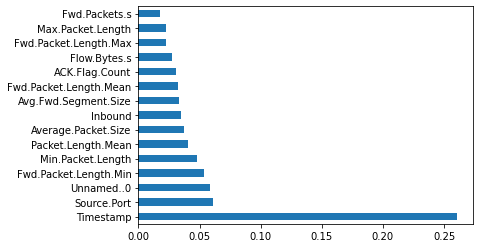

In [ ]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=c.columns)
feat_importances.nlargest(15).plot(kind='barh')

plt.show()

In [ ]:
feat_importances.nlargest(25).to_frame()
ft = feat_importances.nlargest(25).to_frame()
ft.index

Index(['Timestamp', 'Source.Port', 'Unnamed..0', 'Fwd.Packet.Length.Min',
       'Min.Packet.Length', 'Packet.Length.Mean', 'Average.Packet.Size',
       'Inbound', 'Avg.Fwd.Segment.Size', 'Fwd.Packet.Length.Mean',
       'ACK.Flag.Count', 'Flow.Bytes.s', 'Fwd.Packet.Length.Max',
       'Max.Packet.Length', 'Fwd.Packets.s', 'Flow.Packets.s',
       'Destination.Port', 'Protocol', 'Flow.ID',
       'Total.Length.of.Fwd.Packets', 'URG.Flag.Count', 'Subflow.Fwd.Bytes',
       'Fwd.IAT.Mean', 'Flow.IAT.Mean', 'Fwd.IAT.Max'],
      dtype='object')

In [ ]:
df17 = df16[ft.index]

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
np.random.seed(123)

In [ ]:
corr = df17.corr()

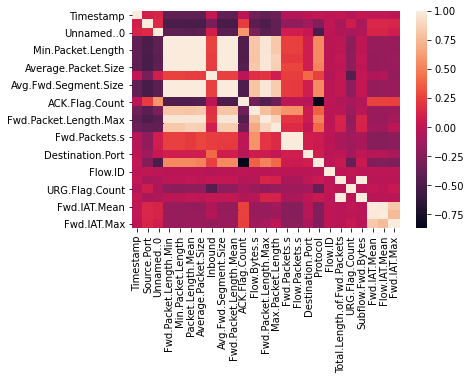

In [ ]:
import seaborn as sns
sns.heatmap(corr)

In [ ]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = df17.columns[columns]
df18 = df17[selected_columns]

In [ ]:
df18

,Timestamp,Source.Port,Unnamed..0,Fwd.Packet.Length.Min,Inbound,ACK.Flag.Count,Flow.Bytes.s,Max.Packet.Length,Fwd.Packets.s,Destination.Port,Protocol,Flow.ID,Total.Length.of.Fwd.Packets,URG.Flag.Count,Fwd.IAT.Mean,Fwd.IAT.Max
0,29440.0,872.0,1110.0,1472.0,1.0,0.0,1.470000e+09,1472.0,1.000000e+06,45984.0,17.0,1.721605e+25,2944.0,0.0,2.0000,2.0
1,31011.0,867.0,25998.0,1472.0,1.0,0.0,6.846512e+07,1472.0,4.651163e+04,39632.0,17.0,1.721605e+25,2944.0,0.0,43.0000,43.0
2,24384.0,818.0,10751.0,1472.0,1.0,0.0,2.940000e+09,1472.0,2.000000e+06,826.0,17.0,1.721605e+23,2944.0,0.0,1.0000,1.0
3,27015.0,894.0,15983.0,1472.0,1.0,0.0,2.940000e+09,1472.0,2.000000e+06,32984.0,17.0,1.721605e+25,2944.0,0.0,1.0000,1.0
4,26581.0,877.0,29733.0,1472.0,1.0,0.0,9.813333e+08,1472.0,6.666667e+05,12571.0,17.0,1.721605e+25,2944.0,0.0,3.0000,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359995,24165.0,58956.0,10503.0,0.0,0.0,0.0,2.242152e+02,6.0,1.868460e+01,465.0,6.0,1.731947e+28,0.0,1.0,0.0000,0.0
359996,44457.0,54494.0,14271.0,6.0,0.0,0.0,4.554080e+04,6.0,3.795066e+03,443.0,6.0,1.732412e+29,12.0,1.0,1.0000,1.0
359997,43482.0,56713.0,4911.0,0.0,0.0,1.0,4.537957e+02,1071.0,1.011526e+00,80.0,6.0,1.921685e+27,4034.0,0.0,722016.2667,9989946.0
359998,45491.0,443.0,249414.0,6.0,1.0,0.0,1.071429e+05,6.0,5.952381e+03,60907.0,6.0,1.722171e+28,6.0,1.0,0.0000,0.0


In [ ]:
X = df18
y = df16['Label']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[5980    0    0    0    0    2    0    0    0    1    2    0]
 [   0 5954    1    0    0    0    0    1   14   30    0    0]
 [   0    0 5857    1    1    0    0    0    0  198    1    1]
 [   0    0    0 6078    2    0    0    0    1    0    1    3]
 [   1    0    0    0 5813    2    0    0    0    0    0    1]
 [   0    0    1    0    0 6072    0    0    0    0    1    0]
 [   0    0    0    0    0    0 5982    0    0    0    0    2]
 [   0    0    5    0    2    0    0 5982    1    2    0    0]
 [   1   13    0    0    3    0    0    1 5990    0    0    0]
 [   1   35  204    0    0    0    0    3    0 5730    1    0]
 [   0    0    2    0    1    1    1    1    1    0 6044    1]
 [   0    0    0    5    0    1    0    0    0    0    1 5963]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5985
         1.0       0.99      0.99      0.99      6000
         2.0       0.96      0.97      0.97      6059
         3.0       1.00   

In [ ]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9947222222222222


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=10)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8938472222222222


In [ ]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.22980555555555557
